In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-22-complete-player-dataset/female_players_17.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_20.csv
/kaggle/input/fifa-22-complete-player-dataset/players_15.csv
/kaggle/input/fifa-22-complete-player-dataset/players_16.csv
/kaggle/input/fifa-22-complete-player-dataset/Career Mode female player datasets - FIFA 16-22.xlsx
/kaggle/input/fifa-22-complete-player-dataset/players_17.csv
/kaggle/input/fifa-22-complete-player-dataset/players_18.csv
/kaggle/input/fifa-22-complete-player-dataset/players_19.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_16.csv
/kaggle/input/fifa-22-complete-player-dataset/players_22.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_18.csv
/kaggle/input/fifa-22-complete-player-dataset/players_21.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_19.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_22.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_21.cs

In [3]:
df = pd.read_csv("/kaggle/input/fifa-22-complete-player-dataset/players_22.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [5]:
colnames = df.loc[:,['overall', 'potential', 'wage_eur', 'value_eur', 'age']]

In [6]:
colnames

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [7]:
new_df = colnames.dropna()

In [8]:

    new_data = ((new_df - new_df.min()) / (new_df.max() - new_df.min())) * 10 + 1

In [9]:
new_data

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185
...,...,...,...,...,...
19234,1.000000,1.652174,1.014306,1.003144,3.222222
19235,1.000000,3.173913,1.000000,1.005206,2.111111
19236,1.000000,2.304348,1.000000,1.004691,2.851852
19237,1.000000,3.391304,1.000000,1.005206,2.111111


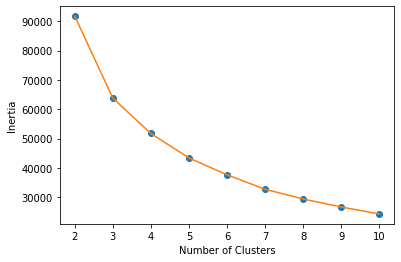

In [10]:

sse = []

for i in range(2,11):
    k_mean=KMeans(n_clusters=i,init='k-means++')
    
    k_mean.fit(new_data)
    sse.append(k_mean.inertia_)

plt.plot(np.arange(2,11),sse,'o')
plt.plot(np.arange(2,11),sse,'-')
plt.xlabel('Number of Clusters') 
plt.ylabel('Inertia');


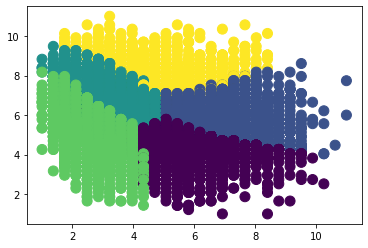

In [13]:

k_mean=KMeans(n_clusters=5,init='k-means++')

k_mean.fit(new_data)


labels = k_mean.labels_

plt.scatter( x = 'age', y = 'potential', data = new_data, c = labels, s = 100)


plt.show()